In [3]:
import networkx as nx
from sympy import *
from bond_graph import *
from scipy import *
import time
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2



Node Labels: 
{0: 'Se_0', 1: '1_1', 2: 'C_2', 3: 'I_3'}

Standard Node Order: 
dict_values(['Se_0', '1_1', 'C_2', 'I_3'])

Port Addition Mask: 
[1 1 1 1 1 1 1 1 1 1]

 Causal Adjacency Mask: 
[[0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 1 0]]
12.5% of causal bond actions remain after filtering

 Power Flow Adjacency Mask: 
[[0 1 1 1]
 [0 0 1 1]
 [0 0 0 0]
 [0 0 0 0]]
31.25% of power flow bond addition actions remain after filtering

Unmasked Number of Bond Addition Actions:  256
Masked Number of Bond Addition Actions:  10
Percentage of Original Action Space: 3.90625%


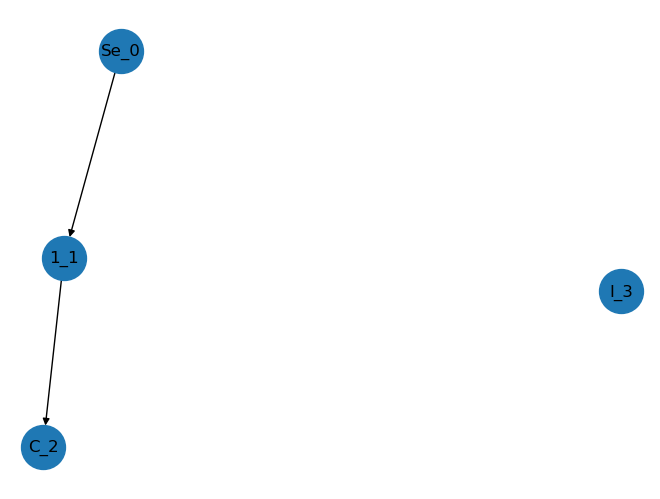

In [276]:
G = BondGraph(max_nodes=20, num_states=4)
G.add_element(EffortSource(np.array([1, 2, 3])))
G.add_element(OneJunction())
G.add_bond(0, 1, 1)
G.add_element(Capacitance(capacitance=10))
G.add_bond(1, 2, 1)
G.add_element(Inertance(inertance=10))
# G.add_bond(3, 1, -1)
# G.add_element(ZeroJunction())
# G.add_bond(4, 1, -1)
# G.add_element(Capacitance(capacitance=10))
# G.add_element(Inertance(inertance=10))
# G.add_bond(4, 5, 1)
# G.add_bond(6, 4, -1)
# G.add_element(Capacitance(capacitance=10))

# print(list(G.graph.nodes(data=True)))
# print(G.graph.nodes['1_1']['node'].element_type)


labels = nx.get_node_attributes(G.flow_causal_graph, 'element_label')

nx.draw(G.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)

## Time to access energy storage elements (custom class vs. networkx)
# start = time.time()
# energy_storage_elements = G.get_energy_storage_elements()
# end = time.time()

# print(energy_storage_elements)
# print("Custom BG Class Elapsed Time: ", end - start)


# start = time.time()
# energy_storage_elements = [x for x,y in G.graph.nodes(data=True) if y['port_type'] == BondGraphPortTypes.CAPACITANCE or y['port_type'] == BondGraphPortTypes.INERTANCE]
# end = time.time()

# print("Networkx Elapsed Time: ", end - start)
# print(energy_storage_elements)

# print(G.graph.nodes)
# print(nx.to_numpy_array(G.graph))
# print(G.get_port_addition_mask())

print("\nNode Labels: ")
print(labels)


print("\nStandard Node Order: ")
# print(G.graph.nodes)
print(labels.values())

print("\nPort Addition Mask: ")
print(G.get_element_addition_mask())

causal_adjacency_mask, power_flow_adjacency_mask = G.get_bond_addition_mask()
print("\n Causal Adjacency Mask: ")
print(causal_adjacency_mask)
percent_fill=np.count_nonzero(causal_adjacency_mask)/np.size(causal_adjacency_mask)
print(f"{percent_fill*100}% of causal bond actions remain after filtering")

print("\n Power Flow Adjacency Mask: ")
print(power_flow_adjacency_mask)
percent_fill=np.count_nonzero(power_flow_adjacency_mask)/np.size(power_flow_adjacency_mask)
print(f"{percent_fill*100}% of power flow bond addition actions remain after filtering")

print("\nUnmasked Number of Bond Addition Actions: ", np.size(causal_adjacency_mask)*np.size(power_flow_adjacency_mask))
print("Masked Number of Bond Addition Actions: ", np.count_nonzero(causal_adjacency_mask) * np.count_nonzero(power_flow_adjacency_mask))
print(f"Percentage of Original Action Space: {(np.count_nonzero(causal_adjacency_mask) * np.count_nonzero(power_flow_adjacency_mask))/(np.size(causal_adjacency_mask)*np.size(power_flow_adjacency_mask))*100}%")


In [ ]:
from sympy import *

params = {"x":1, "y":2}
vars = symbols(list(params.keys()))

print(y)
# for key, value in enumerate(params):
#     vars[key] = params[key]


In [4]:
import itertools
from itertools import permutations 

max_nodes = 3
possible_edge_list = permutations(range(max_nodes), 2)

print(list(possible_edge_list))

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]


In [10]:
import networkx as nx
G = nx.DiGraph()
G.add_node(1, x={'a':1, 'b':2})
G.add_node(2)
G.add_node(3, bond_type='causal')

print(G.nodes)

# print(list(G.nodes.data()))
# for node_data in G.nodes.data():
#     print(node_data)

[1, 2, 3]


In [6]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
num_node_types = 3
max_nodes = 3
""
add_edge_or_node = spaces.Discrete(2)
node_type_space = spaces.Discrete(num_node_types)
mask = (np.array([1, 0, 0], dtype=np.int8), np.array([1, 1, 1] , dtype=np.int8), np.array([1, 1], dtype=np.int8))
print(mask)
edge_type_space = spaces.MultiDiscrete([max_nodes, max_nodes, 2]) 

edge_type_space.sample(mask=mask)

# action_space = spaces.tuple(node_type_space, edge_type_space)
# action_space.sample(num_nodes=1, num_edges=1)

        

(array([1, 0, 0], dtype=int8), array([1, 1, 1], dtype=int8), array([1, 1], dtype=int8))


array([0, 0, 0], dtype=int64)

Bond Graph Variables: 
State Derivatives:  [q_dot_2, p_dot_3]
States:  [q_2, p_3]
Bonds:  [e_1:0, f_1:0, e_1:2, f_1:2, e_1:4, f_1:4, e_3:1, f_3:1]

Constitutive Laws: 
[Eq(Se_0, e_1:0), Eq(-e_3:1, -e_1:0 + e_1:2 + e_1:4), Eq(f_3:1, f_1:0), Eq(f_3:1, f_1:2), Eq(f_3:1, f_1:4), Eq(e_1:2, 20.0*q_2), Eq(q_dot_2, f_1:2), Eq(f_3:1, p_3/3), Eq(p_dot_3, e_3:1), Eq(e_1:4, f_1:4)]

Matrix Formulation (Ax = b): 
A (10, 10): Matrix([[0, 0, -1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, -1, 0, -1, 0, -1, 0], [0, 0, 0, -1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, -1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, -1, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, -1, 0], [0, 0, 0, 0, 0, 0, 1, -1, 0, 0]])
b: (10, 1): Matrix([[-Se_0], [0], [0], [0], [0], [20.0*q_2], [0], [p_3/3], [0], [0]])
x (10): [q_dot_2, p_dot_3] [e_1:0, f_1:0, e_1:2, f_1:2, e_1:4, f_1:4, e_3:1, f_3:1]


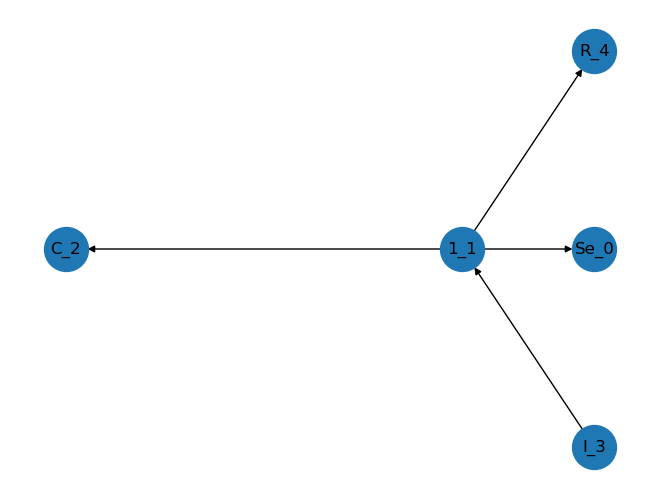

In [12]:
# Initialize bond graph
G = BondGraph(max_nodes=20, num_states=4)
G.add_element(EffortSource(np.array([1, 2, 3])))
G.add_element(OneJunction())
G.add_bond(1, 0, -1)
G.add_element(Capacitance(capacitance=0.05))
G.add_bond(1, 2, 1)
G.add_element(Inertance(inertance=3))
G.add_bond(3, 1, -1)
G.add_element(Resistance(resistance=1))
G.add_bond(1, 4, 1)

# Draw the bond graph with labels
labels = nx.get_node_attributes(G.flow_causal_graph, 'element_label')
nx.draw_spectral(G.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)

# G.get_energy_storage_elements()
# A, b = G.update_state_space_matrix()
# print()
# print(b)
G.update_state_space_matrix(verbose=True)




In [9]:
print(G.flow_causal_graph.nodes(data=True))

[(0, {'element_type': <BondGraphElementTypes.EFFORT_SOURCE: 3>, 'node_index': 0, 'max_ports': 1, 'causality': None, 'params': {}, 'Se': Se_0, 'element_label': 'Se_0'}), (1, {'element_type': <BondGraphElementTypes.ONE_JUNCTION: 6>, 'node_index': 1, 'max_ports': None, 'causality': None, 'params': {}, 'element_label': '1_1'}), (2, {'element_type': <BondGraphElementTypes.CAPACITANCE: 0>, 'node_index': 2, 'max_ports': 1, 'causality': <CausalityTypes.INTEGRAL: 0>, 'params': {'C': 0.05}, 'q': q_2, 'q_dot': q_dot_2, 'element_label': 'C_2'}), (3, {'element_type': <BondGraphElementTypes.INERTANCE: 1>, 'node_index': 3, 'max_ports': 1, 'causality': <CausalityTypes.INTEGRAL: 0>, 'params': {'I': 3}, 'p': p_3, 'p_dot': p_dot_3, 'element_label': 'I_3'}), (4, {'element_type': <BondGraphElementTypes.RESISTANCE: 2>, 'node_index': 4, 'max_ports': 1, 'causality': None, 'params': {'R': 1}, 'element_label': 'R_4'})]


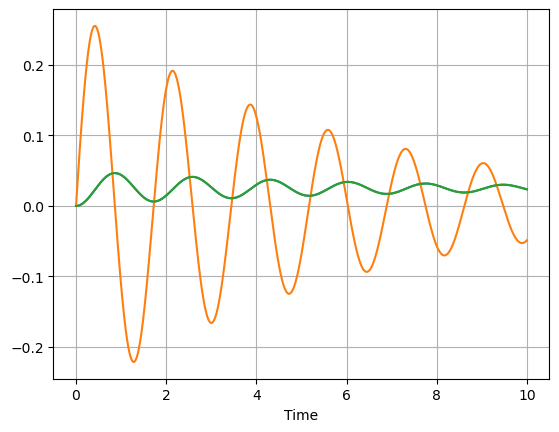

In [267]:
t_span = [0, 10]
t = np.linspace(t_span[0], t_span[1], 1000)
x0 = [0, 0, 0]
# u = lambda t: [np.sin(t)]
u = lambda t: [1]

y = integrate.odeint(G.dynamics, x0, t, args=(u,))

(ts, num_states) = shape(y)
plt.plot(t, y[:, 0], label='x(t)')
plt.plot(t, y[:, 1], label='v(t)')
plt.plot(t, y[:, 2], label='v(t)')
plt.xlabel('Time')
plt.grid()
plt.show()

